<a href="https://colab.research.google.com/github/nuel071003/202255202057-Hizkia-I-S/blob/master/uas_jst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving seattle-weather.csv to seattle-weather.csv


In [ ]:
import pandas as pd

# Pastikan nama file sesuai dengan file yang diunggah
file_name = 'seattle-weather.csv'

In [ ]:
df = pd.read_csv(file_name)

In [ ]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df.isnull().sum()

,0
date,0
precipitation,0
temp_max,0
temp_min,0
wind,0
weather,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
training_set = df.iloc[:,2:3].values
training_set

array([[12.8],
       [10.6],
       [11.7],
       ...,
       [ 7.2],
       [ 5.6],
       [ 5.6]])

In [ ]:
len(training_set)

1461

In [ ]:
def df_to_XY(df,window_size=10):
 X_train=[]
 y_train=[]

 for i in range(10,len(training_set)):
    X_train.append(training_set[i-10:i,0])
    y_train.append(training_set[i,0])

 X_train, y_train = np.array(X_train), np.array(y_train)
 return X_train, y_train

In [ ]:
WINDOW = 10
X,y = df_to_XY(df,WINDOW)
print(len(X),len(y))
X_train = X[:800]
y_train = y[:800]
X_val = X[800:1000]
y_val = y[800:1000]
X_test = X[1000:]
y_test = y[1000:]

1451 1451


In [ ]:
#Reshaping(To add new dimensions)
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_val = np.reshape(X_val,(X_val.shape[0],X_val.shape[1],1))
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [ ]:
#Building the RNN
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [ ]:
from sklearn.metrics import classification_report


In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=32) # Adjust epochs and batch_size as needed

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 237.1388
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 101.4172
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 63.1502
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 59.5736
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 56.5130
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 42.2128
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 32.3118
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 28.1458
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 24.6619
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 23.7415


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [ ]:
#fitting the rnn to the training set
history=regressor.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=100, batch_size=32)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - loss: 250.2673 - val_loss: 223.4978
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 99.8777 - val_loss: 144.5747
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 69.3212 - val_loss: 119.7071
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 60.3852 - val_loss: 103.8957
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 59.3226 - val_loss: 94.2118
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 60.0685 - val_loss: 87.5321
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 55.1176 - val_loss: 82.0656
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 59.5856 - val_loss: 80.7079
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 54.3344 - val_loss: 78.2648
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 54.3048 - val_loss: 77.6842
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 51.6490 - val_loss: 76.2496
Epoch 12/100
25/25 ━━━━━━

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [ ]:
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)),
    Dense(1)  # Output satu unit untuk regresi/prediksi nilai
])

In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
y_pred = model.predict(X_test)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [ ]:
threshold = 0.5
y_pred_binary = (y_pred >= threshold).astype(int)
y_test_binary = (y_test >= threshold).astype(int)


In [ ]:
# Evaluasi Model
print("Classification Report:")
print(classification_report(y_test_binary, y_pred_binary))

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       451

    accuracy                           1.00       451
   macro avg       1.00      1.00      1.00       451
weighted avg       1.00      1.00      1.00       451



In [ ]:
cm = confusion_matrix(y_test_binary, y_pred_binary)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


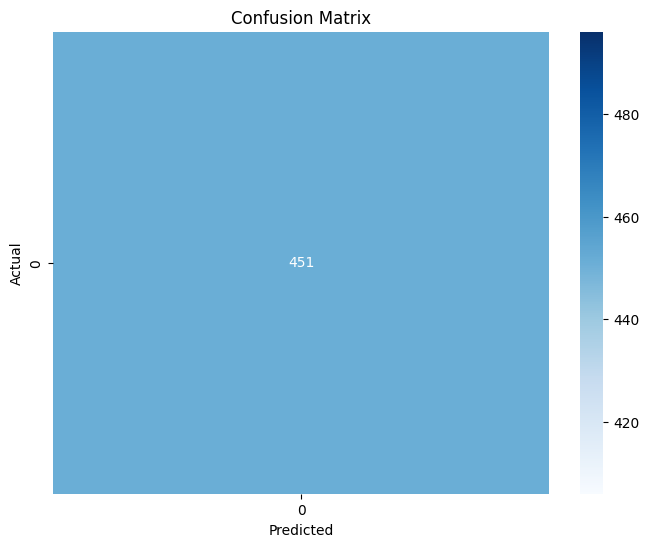

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
accuracy = np.sum(y_test_binary == y_pred_binary) / len(y_test_binary)

In [ ]:
if accuracy == 1.0:
    print("The model achieved 100% accuracy!")
else:
    print(f"The model did not achieve 100% accuracy. Current accuracy: {accuracy:.4f}")

The model did not achieve 100% accuracy. Current accuracy: 451.0000


In [ ]:
accuracy = np.sum(y_test_binary == y_pred_binary) / len(y_test_binary)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 451.0000


In [ ]:
his = pd.DataFrame(history.history)

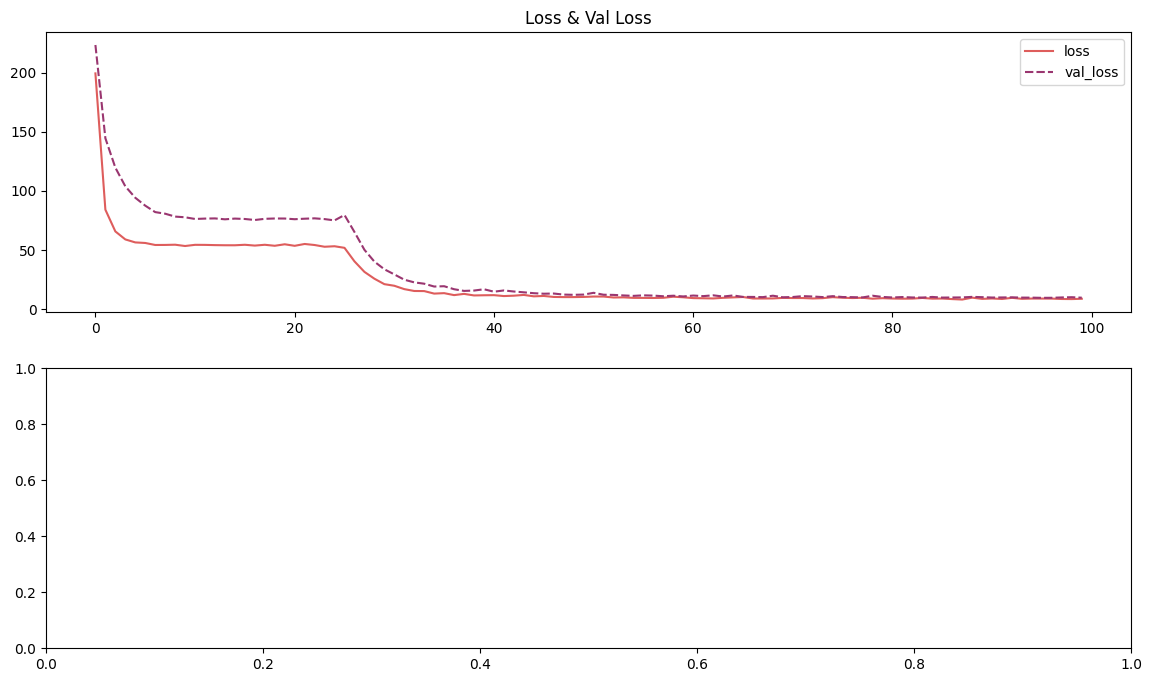

In [ ]:
import seaborn as sns
his.columns
history_loss = his[['loss', 'val_loss']]

fig,axes = plt.subplots(2,1,figsize=(14,8))
plt.subplot(2,1,1)
plt.title("Loss & Val Loss")
sns.lineplot(history_loss,palette="flare");

In [ ]:
train_pred = regressor.predict(X_train).flatten()
val_pred = regressor.predict(X_val).flatten()
test_pred = regressor.predict(X_test).flatten()

25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


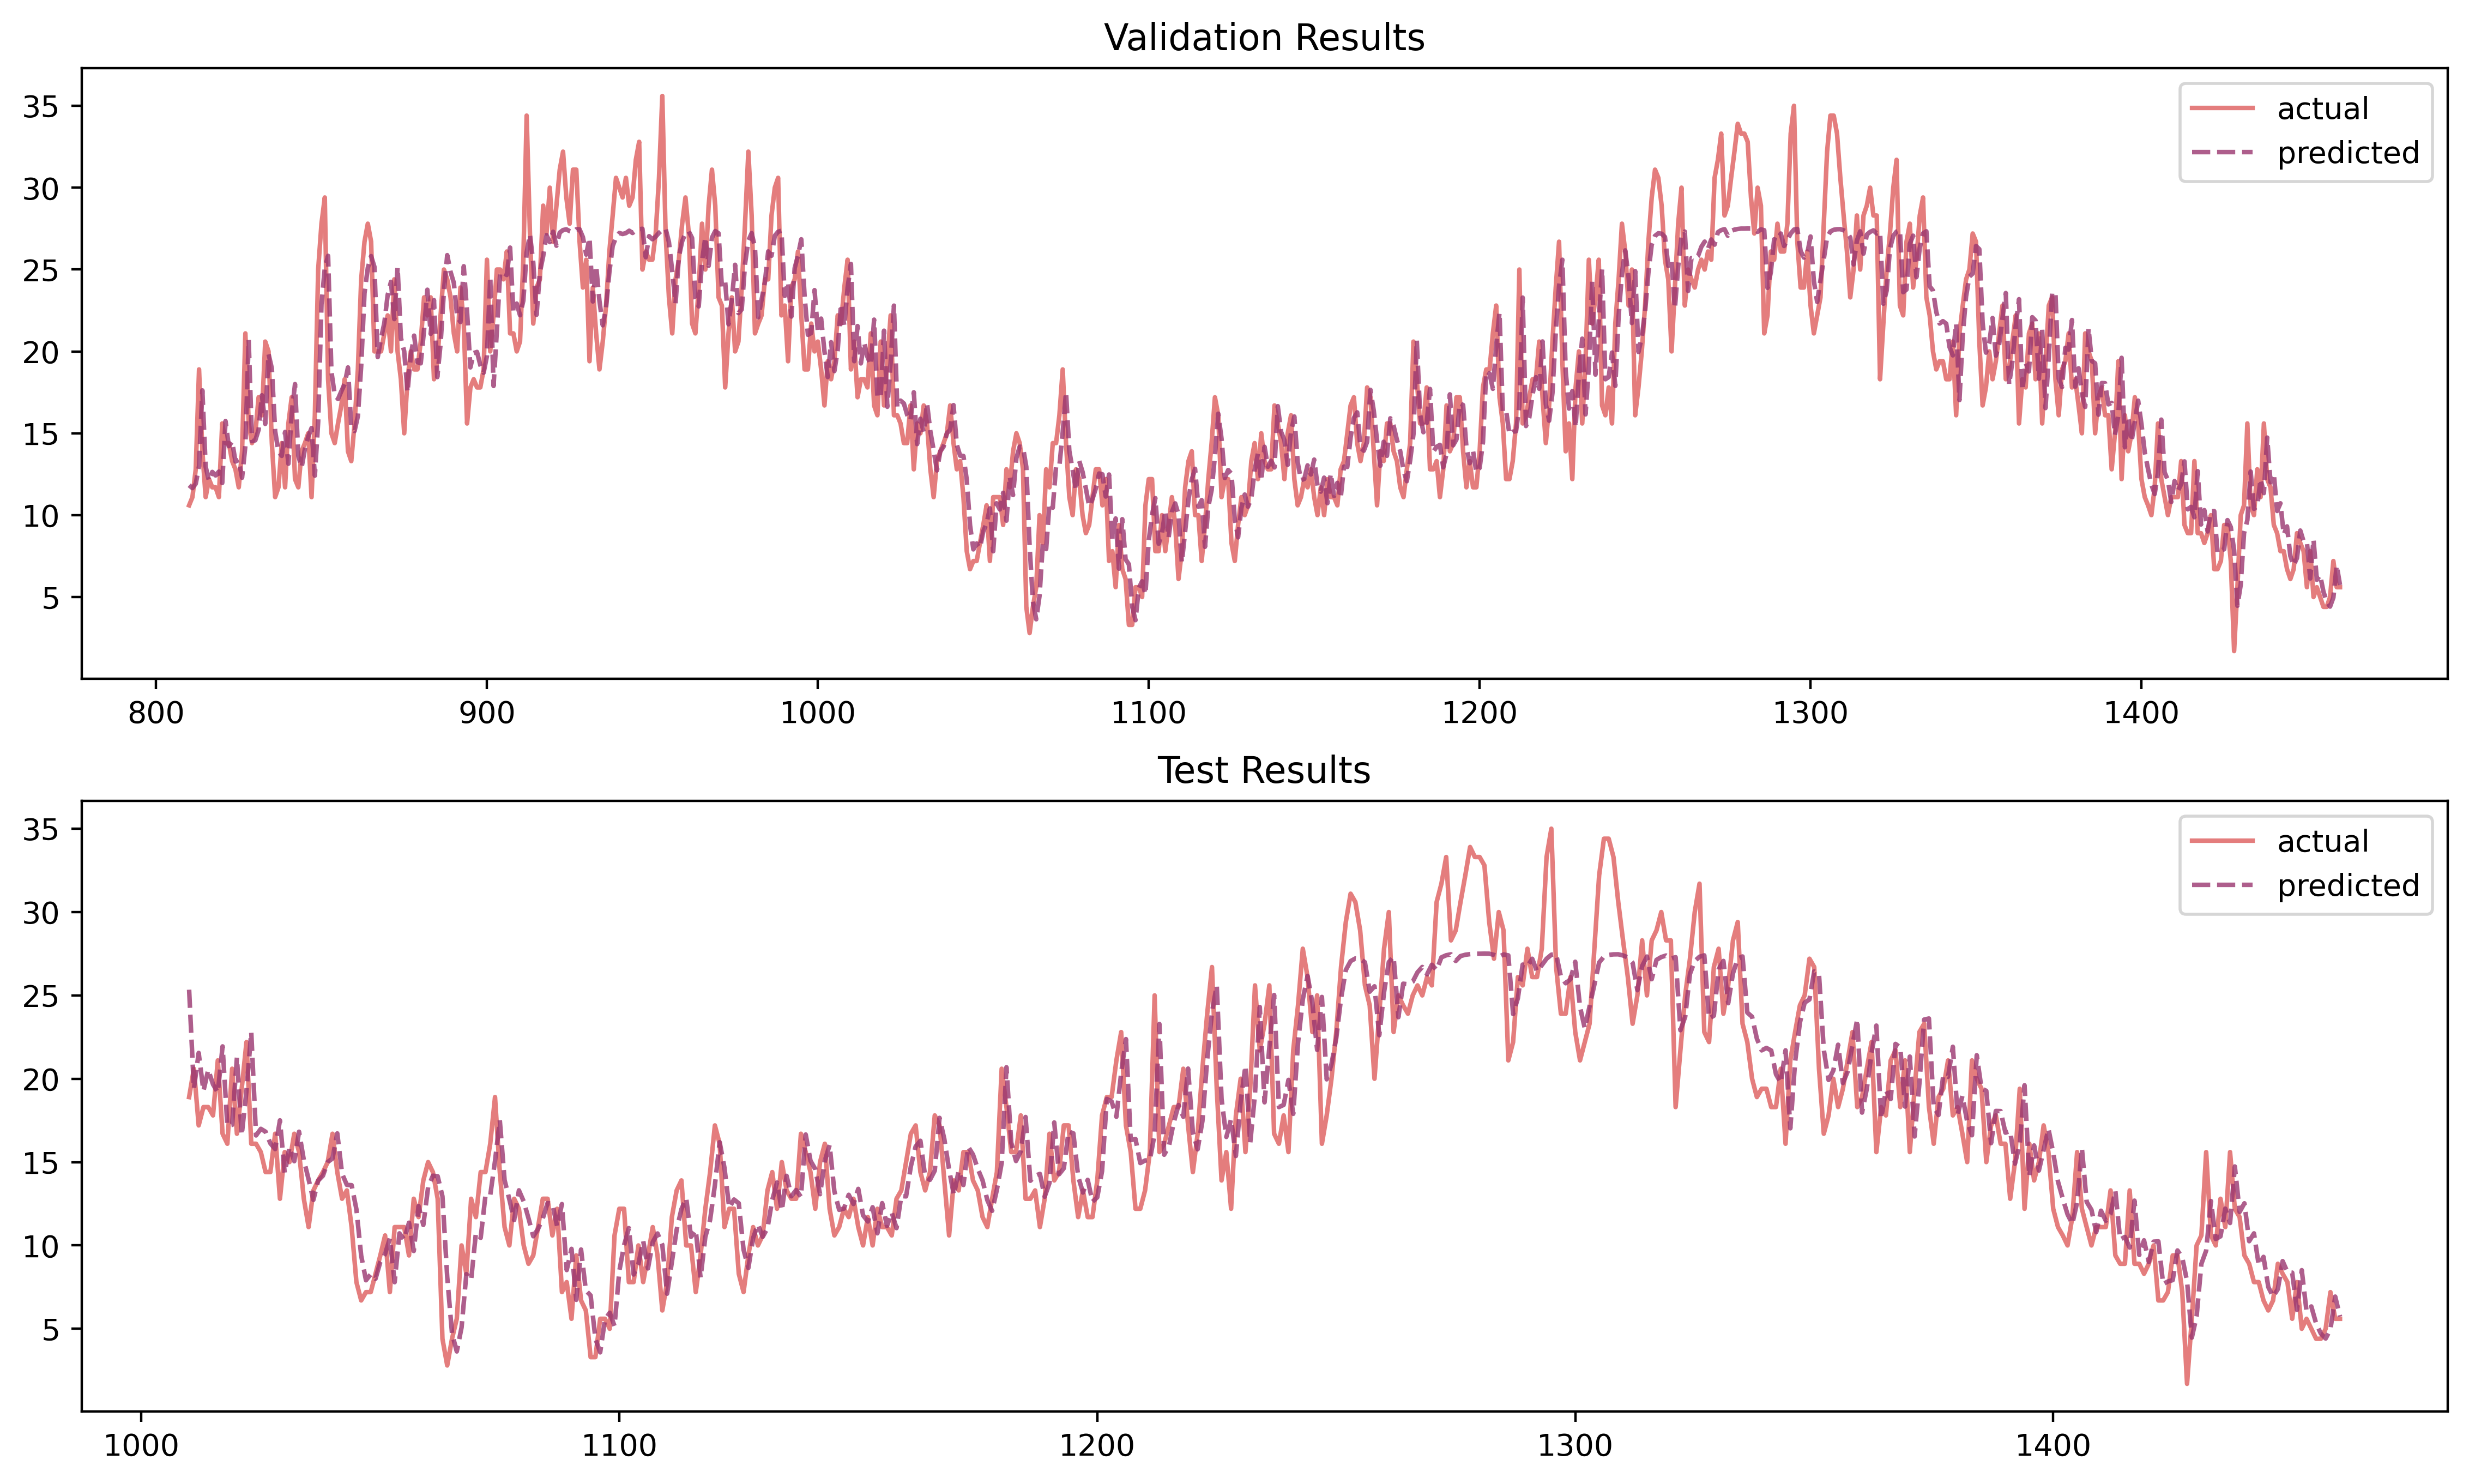

In [ ]:
pred = np.concatenate([train_pred,val_pred,test_pred])
df_pred = pd.DataFrame(df["temp_max"].copy())
df_pred.columns=["actual"]
df_pred = df_pred[WINDOW:]
df_pred["predicted"] = pred

fig,axes = plt.subplots(2,1,figsize=(14,8),dpi=400)

plt.subplot(2,1,1)
plt.title("Validation Results")
sns.lineplot(df_pred[800:],alpha=0.8,palette="flare",linestyle=None);

plt.subplot(2,1,2)
plt.title("Test Results")
sns.lineplot(df_pred[1000:],alpha=0.8,palette="flare",linestyle=None);